In [1]:
import pickle
import pandas as pd

In [3]:
with open(r"full_path\Extended_manhattan_pooling.obj", "rb") as file:
    data = pickle.load(file)

In [15]:
data[0].keys()

dict_keys(['requests', 'schedule', 'results', 'settings'])

In [18]:
data[0]["requests"].columns

Index(['id', 'pickup_datetime', 'dropoff_datetime', 'trip_duration', 'origin',
       'destination', 'status', 'dist', 'treq', 'ttrav', 'pax_id', 'VoT',
       'delta', 'u', 'u_PT', 'ride_id', 'ttrav_sh', 'u_sh', 'kind', 'position',
       'x_org', 'y_org', 'x_dest', 'y_dest'],
      dtype='object')

In [20]:
data[0]["requests"][:1]

,id,pickup_datetime,dropoff_datetime,trip_duration,origin,destination,status,dist,treq,ttrav,...,u_PT,ride_id,ttrav_sh,u_sh,kind,position,x_org,y_org,x_dest,y_dest
0,id0190469,2016-01-01 00:00:17,2016-01-01 00:14:26,849,42427352,42438018,0,14340,0,2390,...,999999,306,2591,29.772825,21,0,-73.981942,40.719462,-73.938959,40.828984


In [28]:
len(data)

34592

In [26]:
data[0]["settings"]

{'Replication': 0,
 'Batch': 0,
 'shared_discount': 0.2,
 'Start_time': Timestamp('2016-01-01 00:00:17'),
 'End_time': Timestamp('2016-01-01 00:29:45'),
 'Demand_size': 198}

In [27]:
data_one_discount = [d for d in data if d["settings"]["shared_discount"] == 0.32]

In [21]:
for d in data_one_discount:
    d["requests"]["ttrav_add"] = (d["requests"]["ttrav_sh"] - d["requests"]["ttrav"])/d["requests"]["ttrav"]

In [39]:
data_one_discount[0]["requests"][:1]

,id,pickup_datetime,dropoff_datetime,trip_duration,origin,destination,status,dist,treq,ttrav,...,ride_id,ttrav_sh,u_sh,kind,position,x_org,y_org,x_dest,y_dest,ttrav_add
0,id0190469,2016-01-01 00:00:17,2016-01-01 00:14:26,849,42427352,42438018,0,14340,0,2390,...,2057,2848,28.779575,50,0,-73.981942,40.719462,-73.938959,40.828984,0.191632


In [29]:
len(data_one_discount)

8686

In [30]:
df = pd.DataFrame()
for d in data_one_discount:
    df = pd.concat([df, d['requests']], ignore_index=True)

In [31]:
len(df)

1227731

In [32]:
df[:2]

,id,pickup_datetime,dropoff_datetime,trip_duration,origin,destination,status,dist,treq,ttrav,...,ride_id,ttrav_sh,u_sh,kind,position,x_org,y_org,x_dest,y_dest,ttrav_add
0,id0190469,2016-01-01 00:00:17,2016-01-01 00:14:26,849,42427352,42438018,0,14340,0,2390,...,2057,2848,28.779575,50,0,-73.981942,40.719462,-73.938959,40.828984,0.191632
1,id1210365,2016-01-01 00:01:01,2016-01-01 00:07:49,408,42432756,42434113,0,2640,44,440,...,1,440,5.500000,1,0,-73.965196,40.801107,-73.947489,40.815207,0.000000


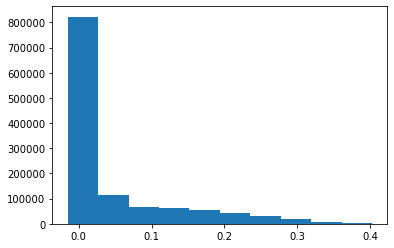

In [34]:
import matplotlib.pyplot as plt

plt.hist(df["ttrav_add"])
plt.show()
plt.close()

In [37]:
len(df.loc[df["ttrav_add"] == 0])

741972

# On the other hand

In [38]:
data_one_discount[0]["results"]

VehHourTrav                    74426
VehHourTrav_ns                114141
PassHourTrav                  126651
PassHourTrav_ns               114141
PassUtility               1361.61053
PassUtility_ns              1427.544
mean_lambda                 0.414819
revenue_s                  116423.82
revenue_ns                  171211.5
Fare_Discount                  -0.32
nR                               198
SINGLE                            74
PAIRS                             35
TRIPLES                            6
QUADRIPLES                         5
QUINTETS                           2
PLUS5                              1
shared_ratio                0.626263
fleet_size_nonshared            82.0
fleet_size_shared               51.0
lambda_shared               0.414819
_typ                    {'_typ': {}}
dtype                   {'_typ': {}}
dtype: object

In [41]:
for d in data_one_discount:
    d["results"]["PassHourTrav_add"] = (d["results"]["PassHourTrav"] - d["results"]["PassHourTrav_ns"])/d["results"]["PassHourTrav_ns"]

In [42]:
res_list = []
for d in data_one_discount:
    res_list.append(d["results"]["PassHourTrav_add"])

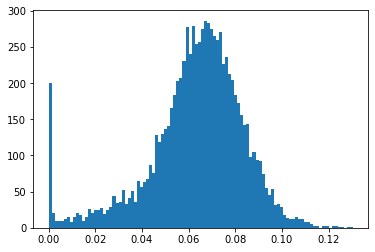

In [46]:
plt.hist(res_list, bins=100)
plt.show()
plt.close()

# Skip this part

In [43]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scienceplots
import pickle
import numpy as np
import scipy.stats

plt.style.use(['science','no-latex'])

In [2]:
with open(r"C:\Users\zmich\OneDrive - Uniwersytet Jagielloński\Szkoła Doktorska\Miscellaneous\Extended_manhattan_pooling.obj", "rb") as file:
    data = pickle.load(file)

In [37]:
data_one_discount = [d for d in data if d["settings"]["shared_discount"] == 0.32]

In [38]:
df = pd.DataFrame()
for d in data_one_discount:
    df = pd.concat([df, pd.Series(d["results"].to_dict() | d["settings"]).to_frame().T], ignore_index=True)
df[:3]

,VehHourTrav,VehHourTrav_ns,PassHourTrav,PassHourTrav_ns,PassUtility,PassUtility_ns,mean_lambda,revenue_s,revenue_ns,Fare_Discount,...,fleet_size_shared,lambda_shared,_typ,dtype,Replication,Batch,shared_discount,Start_time,End_time,Demand_size
0,74426,114141,126651,114141,1361.61053,1427.544,0.414819,116423.82,171211.5,-0.32,...,51.0,0.414819,"{'_typ': {}, 'tzinfo': {}}",{'_typ': {}},0,0,0.32,2016-01-01 00:00:17,2016-01-01 00:29:45,198
1,93449,132553,144680,132553,1579.44882,1657.8305,0.360541,135204.06,198829.5,-0.32,...,58.0,0.360541,{'_typ': {}},{'_typ': {}},0,1,0.32,2016-01-01 00:30:04,2016-01-01 00:59:48,246
2,83894,116591,126412,116591,1394.82214,1458.199,0.364106,118922.82,174886.5,-0.32,...,47.0,0.364106,{'_typ': {}},{'_typ': {}},0,2,0.32,2016-01-01 01:00:07,2016-01-01 01:29:59,208


In [5]:
df['Start_time'] = pd.to_datetime(df['Start_time'], errors='coerce',utc=True)
df['End_time'] = pd.to_datetime(df['End_time'], errors='coerce',utc=True)

In [ ]:
with open(r"C:\Users\zmich\OneDrive - Uniwersytet Jagielloński\Szkoła Doktorska\Miscellaneous\Extended_manhattan_pooling_res.obj", "wb") as file:
    pickle.dump(file, df)

In [43]:
df2 = df.copy()
date_columns = df.select_dtypes(include=['datetime64[ns, UTC]']).columns
for date_column in date_columns:
    df[date_column] = df[date_column].to_pydatetime()

In [54]:
df.drop(columns=["_typ", "dtype"], inplace=True)

In [78]:
df3 = pd.DataFrame()
for column in df.columns:
    df3[column] = df[column]
df3.to_excel("ee.xlsx")

# From here

In [2]:
df = pd.read_excel(r"C:\Users\zmich\OneDrive - Uniwersytet Jagielloński\Szkoła Doktorska\Miscellaneous\res_32.xlsx")

In [3]:
df['del_VehHourTrav']=abs(df['VehHourTrav']-df['VehHourTrav_ns'])/df['VehHourTrav_ns']           # KPI1: vehicle hours reduction
df['del_PassUtility']=abs((df['PassUtility']-df['PassUtility_ns'])/df['PassUtility_ns'])      # KPI2: travellers utility gains
df['Occupancy']=df['PassHourTrav']/df['VehHourTrav']                                       # KPI4: occupancy
df['del_PassHourTrav']=abs((df['PassHourTrav']-df['PassHourTrav_ns'])/df['PassHourTrav_ns'])  # KPI5: passenger hours increase

In [4]:
df['Trips']=df['Demand_size']*2

Text(0.5, 1.0, 'Passenger hours increase')

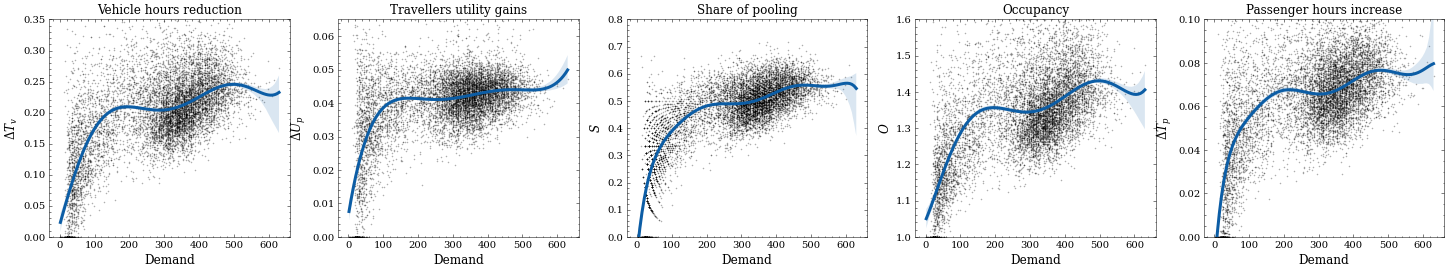

In [106]:
fig, axes = plt.subplots(1,5, figsize = (25,4))
axes = axes.flatten()

ax=axes[0]
to_plot = df
sns.regplot(data = to_plot, x = 'Trips', y = 'del_VehHourTrav', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 6, ax = ax, 
            line_kws = {'lw':3})
ax.set_ylim((0,0.35))
ax.set_ylabel("$\Delta T_v$", fontsize=12)
ax.set_xlabel("Demand", fontsize=12)
ax.set_title("Vehicle hours reduction", fontsize=12, fontweight='normal')

ax=axes[1]
to_plot = df
sns.regplot(data = to_plot, x = 'Trips', y = 'del_PassUtility', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 5, ax = ax, 
            line_kws = {'lw':3})
ax.set_ylim((0,0.065))
ax.set_ylabel("$\Delta U_p$", fontsize=12)
ax.set_xlabel("Demand", fontsize=12)
ax.set_title("Travellers utility gains", fontsize=12, fontweight='normal')

ax=axes[2]
to_plot = df
sns.regplot(data = to_plot, x = 'Trips', y = 'shared_ratio', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 8, ax = ax, 
            line_kws = {'lw':3})
ax.set_ylim((0,0.8))
ax.set_ylabel("$S$", fontsize=12)
ax.set_xlabel("Demand", fontsize=12)
ax.set_title("Share of pooling", fontsize=12, fontweight='normal')

ax=axes[3]
to_plot = df
sns.regplot(data = to_plot, x = 'Trips', y = 'Occupancy', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 6, ax = ax, 
            line_kws = {'lw':3})
ax.set_ylim((1,1.6))
ax.set_ylabel("$O$", fontsize=12)
ax.set_xlabel("Demand", fontsize=12)
ax.set_title("Occupancy", fontsize=12, fontweight='normal')

ax=axes[4]
to_plot = df
sns.regplot(data = to_plot, x = 'Trips', y = 'del_PassHourTrav', 
            scatter_kws = {'s':0.3, 'alpha':0.3, 'color':'black'}, order = 9, ax = ax, 
            line_kws = {'lw':3})
ax.set_ylim((0,0.1))
ax.set_ylabel("$\Delta T_p$", fontsize=12)
ax.set_xlabel("Demand", fontsize=12)
ax.set_title("Passenger hours increase", fontsize=12, fontweight='normal')

In [50]:
data = [df.loc[df["Start_time"].apply(lambda x: x.hour) == h]['Trips'] for h in range(23)]

l1 = [np.mean(t) for t in data]
l2 = [np.std(t) for t in data]

def foo(l1, l2):
    return [b/a for a, b in zip(l1, l2)]

out = foo(l1, l2)

In [65]:
def mean_confidence_interval(data, confidence=0.9):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return round(m-h, 2), round(m+h, 2)

for e, d in enumerate(data):
    print(f"Hour: {e}:  Mean: {round(l1[e],2)}, St_dev: {round(l2[e],2)}, Mean CI(90): {mean_confidence_interval(d)}, min: {min(data[e])}, max: {max(data[e])}, Percentiles (5/95): {round(np.percentile(data[e], 5),2)}, {round(np.percentile(data[e], 95),2)}")

Hour: 0:  Mean: 216.51, St_dev: 113.99, Mean CI(90): (206.61, 226.4), min: 42, max: 512, Percentiles (5/95): 78.1, 420.0
Hour: 1:  Mean: 155.85, St_dev: 110.39, Mean CI(90): (146.27, 165.43), min: 28, max: 438, Percentiles (5/95): 44.1, 361.9
Hour: 2:  Mean: 113.72, St_dev: 97.84, Mean CI(90): (105.21, 122.24), min: 2, max: 390, Percentiles (5/95): 26.0, 304.1
Hour: 3:  Mean: 82.6, St_dev: 74.2, Mean CI(90): (76.08, 89.12), min: 10, max: 328, Percentiles (5/95): 18.0, 218.8
Hour: 4:  Mean: 54.29, St_dev: 42.69, Mean CI(90): (50.56, 58.03), min: 2, max: 234, Percentiles (5/95): 19.5, 150.5
Hour: 5:  Mean: 53.78, St_dev: 21.87, Mean CI(90): (51.88, 55.68), min: 2, max: 122, Percentiles (5/95): 26.0, 94.0
Hour: 6:  Mean: 147.3, St_dev: 77.39, Mean CI(90): (140.59, 154.02), min: 4, max: 318, Percentiles (5/95): 40.1, 268.0
Hour: 7:  Mean: 266.31, St_dev: 123.59, Mean CI(90): (255.6, 277.02), min: 8, max: 488, Percentiles (5/95): 64.0, 422.0
Hour: 8:  Mean: 327.2, St_dev: 122.74, Mean CI(90

In [ ]:
from collections import Counter

d0 = data[0]

Counter([])

# 16.03 FROM HERE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from bisect import bisect

In [2]:
df = pd.read_csv("new_michals_figure.csv").sort_values(['0'], ascending=False, ignore_index=True)
df

,h3_address,0
0,892a100d2c3ffff,39039
1,892a100d2dbffff,24016
2,892a100d667ffff,23856
3,892a100d607ffff,22728
4,892a10725a7ffff,22192
...,...,...
502,892a100a163ffff,1
503,892a100aa1bffff,1
504,892a100aa67ffff,1
505,892a100aad7ffff,1


### Here I check where we have 25% of coverage, half and 75%

In [3]:
arr = np.cumsum(df['0'].to_numpy())
def foo(t):
    return bisect(arr, arr[-1]*t)
percents = [foo(t) for t in [0.25, 0.5, 0.75]]
percents

[26, 70, 138]

#### Check

In [4]:
print(f'25%: {arr[26]/arr[-1]}, 50%: {arr[70]/arr[-1]}, 75%: {arr[138]/arr[-1]}')

25%: 0.25643009455070676, 50%: 0.5027912142320653, 75%: 0.7516820606997772


## Plot

In [5]:
arr_normalised = arr/arr[-1]
arr_normalised = np.append([0], arr_normalised) # to start from 0, 0

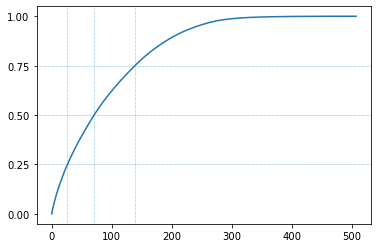

In [6]:
fig, ax = plt.subplots()
plt.plot(arr_normalised)
for p, pp in zip(percents, [0.25, 0.5, 0.75]):
    ax.axvline(p, ls=':', lw=0.5)
    ax.axhline(pp, ls=':', lw=0.5)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.show()
plt.close()

Ver. 2: upgraded graphics + Rafal's suggestion to present in normalised form

In [7]:
import matplotlib.ticker as mtick

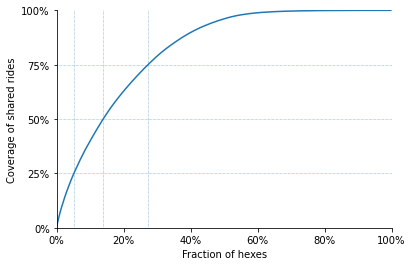

In [8]:
fig, ax = plt.subplots()
plt.plot([t/len(arr_normalised)*100 for t in range(len(arr_normalised))], [t*100 for t in arr_normalised])
for p, pp in zip([t/len(arr_normalised)*100 for t in percents], [25, 50, 75]):
    ax.axvline(p, ls=':', lw=0.5)
    ax.axhline(pp, ls=':', lw=0.5)
ax.set_yticks([0, 25, 50, 75, 100])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(xlabel='Fraction of hexes', ylabel='Coverage of shared rides', ylim=[0, 100], xlim=[0, 100])
plt.show()
plt.close()

Ver 3.:

In [12]:
df2 = pd.read_csv("new_michals_figure_all.csv").sort_values(['0'], ascending=False, ignore_index=True)
arr2 = np.cumsum(df2['0'].to_numpy())
arr_normalised2 = arr2/arr2[-1]

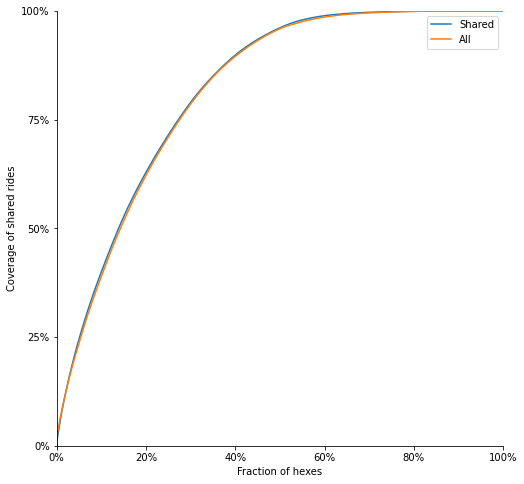

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
plt.plot([t/len(arr_normalised)*100 for t in range(len(arr_normalised))], [t*100 for t in arr_normalised], label='Shared')
plt.plot([t/len(arr_normalised2)*100 for t in range(len(arr_normalised2))], [t*100 for t in arr_normalised2], label='All')
# for p, pp in zip([t/len(arr_normalised)*100 for t in percents], [25, 50, 75]):
#     ax.axvline(p, ls=':', lw=0.5)
#     ax.axhline(pp, ls=':', lw=0.5)
ax.set_yticks([0, 25, 50, 75, 100])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(xlabel='Fraction of hexes', ylabel='Coverage of shared rides', ylim=[0, 100], xlim=[0, 100])
plt.legend()
plt.show()
plt.close()